# Required Lift and optimum L/D

<img src="img/unstallable00.png" alt="Pic here" style="width:700px">

## Geometry and total mass

The lift required will be equal to the weight of the aircraft, hence, let's parameterized the weight as a function of geometric parameter. 

First off, we have the following base weights:

<strong>Component &nbsp; &nbsp;Estimated Weight (grams/each)</strong><br>ESC (2): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 9<br>BEC (1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 16<br>Raspberry Pi 3&nbsp;(1): 47<br>Flip32&nbsp;(1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14<br>Battery&nbsp;(1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 36<br>Propeller&nbsp;(1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;3<br>GPS&nbsp;(1): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 32<br>Motor&nbsp;(2): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 15<br>Servos (2-4): &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;9<br>Wires, connectors, etc throughout plane: &nbsp;50</p>


The geometry of the aircraft is then parameterized as follows:

<img src="img/canard00.png" alt="Pic here" style="width:700px">


Hence, the weight of fuselage ($M_f$), wing ($M_w$), canard ($M_c$), and vertical tail ($M_t$) will be calculated as 

\begin{align}
        \bullet \quad & M_f = 4\rho_c w l
    \\
        \bullet \quad & M_w = 2 \rho_f \Big[ (\frac{c_{wt}+c_{wr}}{2}) \frac{b_w/2}{\cos\Lambda_w} (\frac{c_{wt}+c_{wr}}{2})0.5 t_w^* \Big]
    \\ & \qquad = \rho_f \frac{b_w/2}{\cos\Lambda_w} (\frac{c_{wt}+c_{wr}}{2})^2t_w^{*}
    \\
        \bullet \quad & M_c = \rho_f \frac{b_c/2}{\cos\Lambda_c} (\frac{c_{ct}+c_{cr}}{2})^2t_c^*
    \\
        \bullet \quad & M_t = \rho_f \frac{l_r+l_t}{2}h t_t
\end{align}

with $\rho_f = 24.8\text{ kg/m}^3$ volumetric density of foam, and $\rho_c = 3.6 \text{ kg/m}^2$ the area density of cardboard. 

In [1]:
using PyPlot

include("../code/parameters.jl")

# # ------ CONSTANTS
# g = 9.82          # (m/s^2) gravity
# rhoinf = 1.225    # (kg/m^3) air density at sea level and 15Cdegs
# mu = 1.846/10^5   # (kg/m*s) air dynamic viscosity

# # ------ MATERIALS
# rho_c = 3.6       # (kg/m^2) Cloroplast area density
# rho_f = 24.8        # (kg/m^3) HD EPS foam density

# # ------ GEOMETRIC PARAMETERS
# # Fuselage
# w = 8/100         # (m) width
# l = 0.75          # (m) length
# # Wing
# b_w = 0.95        # (m) span
# lambda_w = 30*pi/180        # (rad) sweep
# c_wtip = 0.10     # (m) tip chord
# c_wroot = 0.20    # (m) root chord
# t_w = 0.1         # (ratio) ave max thickness/chord
# barc_w = (c_wtip+c_wroot)/2
# AR_w = b_w/c_wtip # Aspect ratio
# tr_w = c_wtip/c_wroot      # Taper ratio
# twist_wtip = 0*pi/180      # Tip twist
# twist_wroot = 4.0*pi/180   # Root twist
# gamma_w = 0*pi/180# Dihedral
# # canard
# b_c = 0.5*b_w     # (m) span
# lambda_c = 0*pi/180        # (rad) sweep
# c_ctip = 0.10     # (m) tip chord
# c_croot = 0.10    # (m) root chord
# t_c = 0.15        # (ratio) ave max thickness/chord
# barc_c = (c_ctip+c_croot)/2
# AR_c = b_c/c_ctip   # Aspect ratio
# tr_c = c_ctip/c_croot      # Taper ratio
# twist_ctip = 5*pi/180      # Tip twist
# twist_croot = 5*pi/180   # Root twist
# gamma_c = 0*pi/180# Dihedral
# # vertical tail
# h_t = 0.17        # (m) height
# l_troot = 0.20    # (m) root length
# l_ttip = l_troot/3# (m) tip length
# t_t = 0.04        # (m) thickness
# barc_t = (l_ttip+l_troot)/2

# Sref = 2*b_w*barc_w      # Reference area

# # ------ AIRPLANE ASSEMBLY
# x_w, y_w, z_w = l*2/4, 0, w/4     # Wing's position in fuselage
# x_c, y_c, z_c = l*1/16, 0, 0.0     # Canard's position in fuselage
# x_t, y_t, z_t = l-l_troot, 0, 0.0  # Tail's position in fuselage

# # ------ USEFUL FUNCTIONS
# calc_Re(Vinf, l) = rhoinf*Vinf*l/mu
# calc_qinf(Vinf) = 1/2*rhoinf*Vinf.^2
# Vinfmin, Vinfmax = 3, 20 # (m/s)


# # ------ ASSUMPTIONS
# CLratio = 0.1    # Canard-wing distribution of lift
#                  #   CLratio = CLcanard/CLtot

# # Mass of electronic components
# M_base = (9 + 16 + 47 + 14 + 36 + 3 + 32 + 15 + 9*4 + 50)/1000
# # Mass of structural components
# M_f = rho_c * 4*w*l
# M_w = rho_f * b_w/2/cos(lambda_w) * barc_w^2 * t_w
# M_c = rho_f * b_c/2/cos(lambda_c) * barc_c^2 * t_c
# M_t = rho_f * barc_t * h_t*t_t
# # Total mass
# Mtot = sum([M_base, M_f, M_w, M_c, M_t])
# # Required lift in cruise
# L = Mtot*g
# println("Total mass: $Mtot (kg)")
println("Lift required: $L (N)")



Total mass: 0.3536271487697421 (kg)
Lift required: 3.4726186009188678 (N)


## Drag calculation

The drag will be broken down into parasitic drag ($D_p$) and lifting drag ($D_i$) with components as follow:

\begin{align}
    \bullet \quad & D_p = (D_p)_f + (D_p)_w + (D_p)_c + (D_p)_t
    \\
    \bullet \quad & D_i = (D_i)_w + (D_i)_c + (D_i)_t
\end{align}

with subindices $f,w,c,t$ indicating fuselage, wing, canard, and tail, respectively.



### Parasitic drag

For a flat plate:
<img src="img/friction00.png" alt="Pic here" style="width:400px">

For an airfoil, take the flate plate $(C_{f})_{airfoil} = k(C_{f})_{flatplate}$, with $k$ the form factor

<img src="img/friction01.png" alt="Pic here" style="width:300px">

Is $\Lambda$ the sweep of the wing or the angle of attack at this section? It is sweep. Look at this graph from Prof. Alonso's notes (`etc/JJAlonso_drag.pdf`):

<img src="img/friction02.png" alt="Pic here" style="width:300px">

For a body-of-revolution fuselage we have the following form factor:

<img src="img/friction03.png" alt="Pic here" style="width:300px">

which can be used to calculate a boxed fuselage:

<img src="img/friction04.png" alt="Pic here" style="width:300px">

Verifying the Cf function with a discontinuous step between laminar and turbulent:

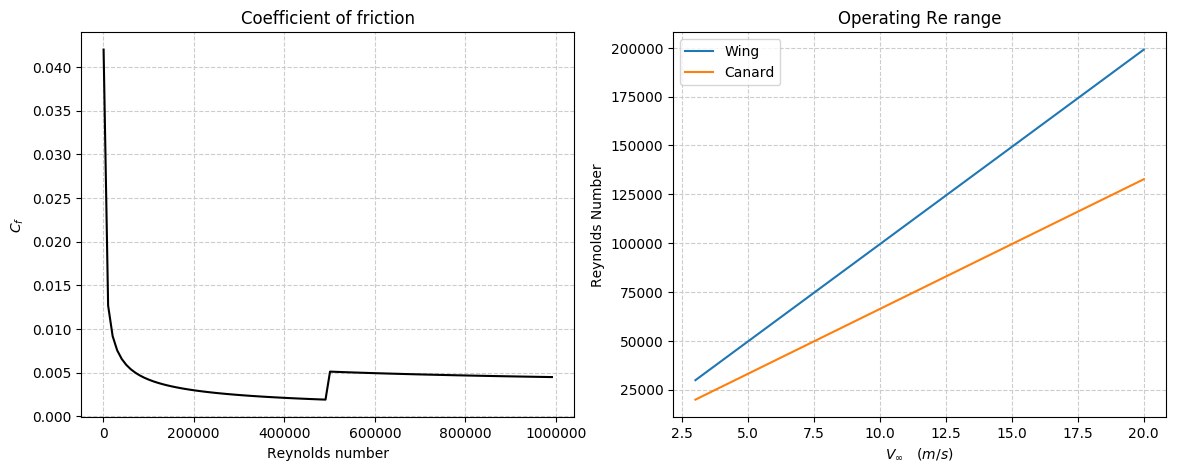

PyObject <matplotlib.legend.Legend object at 0x7fdc5b005f90>

In [2]:
# Coefficient of friction, Cf = tau / qinf
Cf_lam(Re) = 1.328/sqrt(Re)              # Average coeff laminar flow over flat plate
Cf_tur(Re) = 0.455/(log10(Re))^(2.58)    # Average coeff turbulent flow over flat plate
Cf(Re) = Re<5*10^5 ? Cf_lam(Re) : Cf_tur(Re)
# Form factors
k_lift(t_over_c, sweep) = 1 + 2*cos(sweep)*t_over_c + 100*(t_over_c)^4        # Lifting surface
k_revbody(l_over_d) = l_over_d<15 ? 1.675-0.09*l_over_d+0.003*l_over_d^2 : 1  # Body of revolution

fig = figure("Cf_Re", figsize=(7*2,5*1))

subplot(121)
x = [xi for xi in 1000:10^6/100:10^6]
y = [Cf(xi) for xi in x]
plot(x,y, "k""")
grid(true, color="0.8", linestyle="--")
xlabel("Reynolds number")
ylabel(L"C_f")
title("Coefficient of friction")

subplot(122)
x = [Vinf for Vinf in Vinfmin:0.5:Vinfmax]
for (label, lref) in [("Wing", barc_w), ("Canard", barc_c)]
    y = [calc_Re(Vinf, lref) for Vinf in x]
    plot(x,y, label=label)
end
grid(true, color="0.8", linestyle="--")
xlabel(L"V_\infty \quad (m/s)")
ylabel("Reynolds Number")
title("Operating Re range")
legend(loc="best")

From the plot on the right we see that we are flying way below the turbulent limit ($<10^5$), so let's assume laminar flow in our calculations.

From $C_f$ of each component, the parasitic drag is calculated as:

<img src="img/friction06.png" alt="Pic here" style="width:300px">
<img src="img/friction05.png" alt="Pic here" style="width:300px">

In [3]:
function calc_CDp(Vinf; Cftype="transition")
    
    if Cftype=="laminar"
        _Cf = Cf_lam
    elseif Cftype=="turbulent"
        _Cf = Cf_tur
    else
        _Cf = Cf
    end
    
    qinf = calc_qinf(Vinf)
    
    # Fuselage
    deff = sqrt(4*w^2/pi)
    CDp_f = k_revbody(l/deff) * _Cf(calc_Re(Vinf, l)) * (4*w*l)/Sref
    # Wing
    Sexp_w = 2*( (b_w/2 - w/2 )*barc_w )
    CDp_w = k_lift(t_w, lambda_w) * _Cf(calc_Re(Vinf, barc_w)) * (
                            2*(1+0.2*t_w)*Sexp_w)/Sref
    # Canard
    Sexp_c = 2*( (b_c/2 - w/2 )*barc_c )
    CDp_c = k_lift(t_c, lambda_c) * _Cf(calc_Re(Vinf, barc_c)) * (
                            2*(1+0.2*t_c)*Sexp_c)/Sref
#     # Horizontal tail
#     tail_t_over_c = t_t/barc_t
#     lambda_tail = atan2(l_troot-l_ttip, h_t)
#     Sexp_t = h_t*barc_t
#     CDp_t = k_lift(tail_t_over_c, lambda_tail) * _Cf(
#                             calc_Re(Vinf, barc_t)) * (
#                             2*(1+0.2*tail_t_over_c)*Sexp_t)/Sref
    
    # Winglets
    winglet_t_over_c = t_wl/barc_wl
    lambda_winglet = atan2(l_wlroot-l_wltip, h_wl)
    Sexp_wl = h_wl*barc_wl
    CDp_wl = k_lift(winglet_t_over_c, lambda_winglet) * _Cf(
                            calc_Re(Vinf, barc_wl)) * (
                            2*(1+0.2*winglet_t_over_c)*Sexp_wl)/Sref
    
    return [CDp_f, CDp_w, CDp_c, 2*CDp_wl]
end



calc_CDp (generic function with 1 method)

### Induced drag


<img src="img/induced02.png" alt="Pic here" style="width:500px">
<img src="img/induced00.png" alt="Pic here" style="width:300px">
<img src="img/induced01.png" alt="Pic here" style="width:300px">

Hence, after calculating $C_{Dp}$ as explained above, the induced drag will be calculated as a function of $C_L$ as:

\begin{align}
    C_{Di} = \frac{C_L^2}{\pi AR e_{inv}} + KC_{Dp}C_L^2
\end{align}

(no need for calculating the Oswald efficiency factor $e$)

### Total drag

The total drag of each component will then be calculated as 

$$ 
C_{Dtot} = C_{Di} + C_{Dp}
$$

In [4]:
function calc_CDtot(Vinf; Cftype="transition")
    qinf = calc_qinf(Vinf)
    K = 0.38
    
    # Distributing the lift between lifting bodies
    CL = L / (qinf*Sref)         # Total CL (full airplane)
    CL_t = 0                     # CL on tail
    CL_wl = 0                     # CL on winglets
    CL_c = CL*CLratio            # CL on canard
    CL_w = CL - (CL_t+CL_c)      # CL on wing
    
    # Parasitic drag
    CDp = calc_CDp(Vinf; Cftype=Cftype)
    CDp_f, CDp_w, CDp_c, CDp_wl = CDp     # Each component's
    
    # Induced drag
    ## Wing
    einv = 0.99*(1-2*(w/b_w)^2)
    AR = b_w / barc_w
    CDiv_w = K*CDp_w*CL_w^2
    CDi_w = CL_w^2/(pi*AR*einv) + CDiv_w
    ## Canard
    einv = 0.99*(1-2*(w/b_c)^2)
    AR = b_c / barc_c
    CDiv_c = K*CDp_c*CL_c^2
    CDi_c = CL_c^2/(pi*AR*einv) + CDiv_c
#     ## Vertical tail
#     einv = 0.99
#     AR = h_t / barc_t
#     CDiv_t = K*CDp_t*CL_t^2
#     CDi_t = CL_t^2/(pi*AR*einv) + CDiv_t
    ## Winglets
    einv = 0.99
    AR = h_wl / barc_wl
    CDiv_wl = K*CDp_wl*CL_wl^2
    CDi_wl = CL_wl^2/(pi*AR*einv) + CDiv_wl
    
    println("CDp=$CDp\tsum(CDp)=$(sum(CDp))")
    
    return [0.0, CDi_w, CDi_c, CDi_wl] + CDp
end


calc_CDtot (generic function with 1 method)

And this is what the drag looks like:

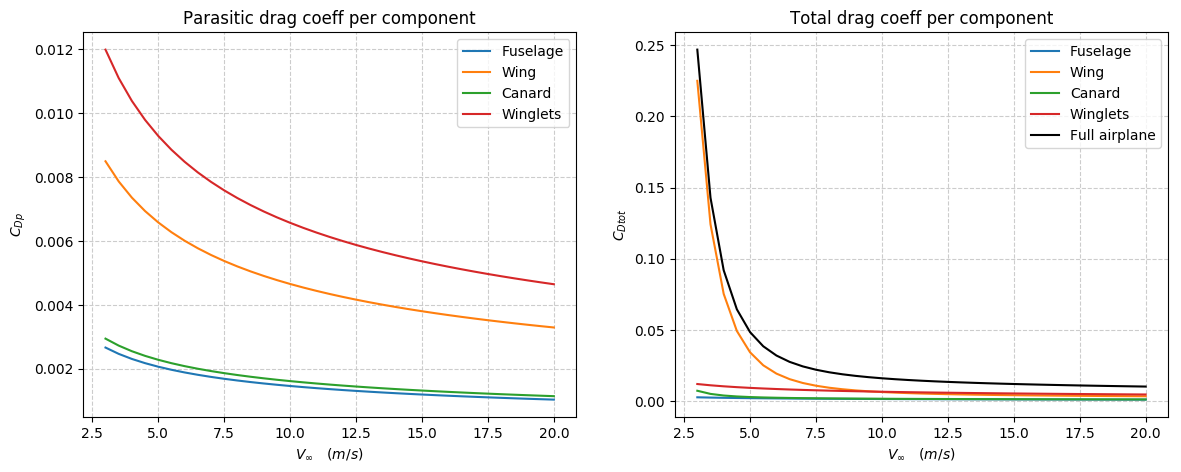

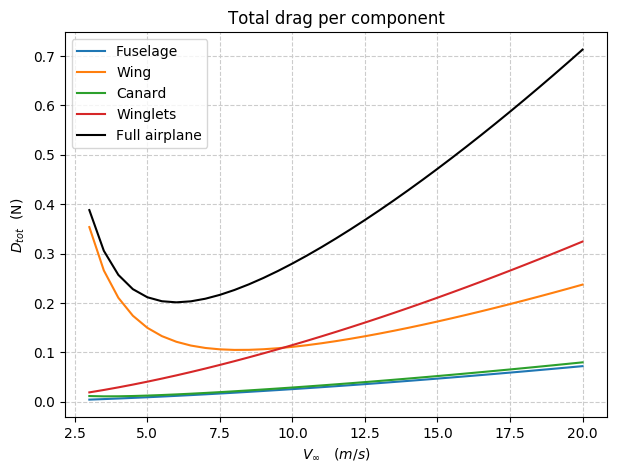

CDp=[0.00266094,0.00849367,0.0029403,0.0119899]	sum(CDp)=0.026084810360692587
CDp=[0.00246356,0.00786361,0.00272219,0.0111005]	sum(CDp)=0.024149841730684497
CDp=[0.00230445,0.00735574,0.00254638,0.0103835]	sum(CDp)=0.022590108425259305
CDp=[0.00217265,0.00693505,0.00240075,0.0097897]	sum(CDp)=0.02129815847365362
CDp=[0.00206116,0.00657917,0.00227755,0.00928733]	sum(CDp)=0.020205207223188217
CDp=[0.00196524,0.00627299,0.00217156,0.00885512]	sum(CDp)=0.019264909195264777
CDp=[0.00188157,0.00600593,0.00207911,0.00847813]	sum(CDp)=0.018444746292010837
CDp=[0.00180776,0.00577031,0.00199754,0.00814553]	sum(CDp)=0.017721139026857537
CDp=[0.001742,0.00556041,0.00192488,0.00784923]	sum(CDp)=0.017076516852348872
CDp=[0.00168293,0.00537187,0.00185961,0.00758307]	sum(CDp)=0.016497482614669372
CDp=[0.00162949,0.00520129,0.00180056,0.00734228]	sum(CDp)=0.015973618855240217
CDp=[0.00158084,0.00504599,0.0017468,0.00712306]	sum(CDp)=0.015496686532591357
CDp=[0.0015363,0.00490382,0.00169759,0.00692237]	

In [13]:
using PyPlot

fig = figure("CDs", figsize=(7*2,5*1))
x = [Vinf for Vinf in Vinfmin:0.5:Vinfmax]
labels = ["Fuselage", "Wing", "Canard", "Winglets"]

subplot(121)
ys = [[], [], [], []]
for (i,Vinf) in enumerate(x)
    CDps = calc_CDp(Vinf; Cftype="transition")
    for (j,CDp) in enumerate(CDps)
        push!(ys[j], CDp)
    end
end
for (i,label) in enumerate(labels)
    plot(x,ys[i], label=label)
end
grid(true, color="0.8", linestyle="--")
xlabel(L"V_\infty \quad (m/s)")
ylabel(L"C_{Dp}")
title("Parasitic drag coeff per component")
legend(loc="best")

subplot(122)
ys = [[], [], [], []]
for (i,Vinf) in enumerate(x)
    CDs = calc_CDtot(Vinf; Cftype="transition")
    for (j,CD) in enumerate(CDs)
        push!(ys[j], CD)
    end
end
for (i,label) in enumerate(labels)
    plot(x,ys[i], label=label)
end
y = [sum([ys[j][i] for j in 1:4]) for i in 1:size(x)[1]]
plot(x,y, "k", label="Full airplane")
grid(true, color="0.8", linestyle="--")
xlabel(L"V_\infty \quad (m/s)")
ylabel(L"C_{Dtot}")
title("Total drag coeff per component")
legend(loc="best")


fig = figure("D", figsize=(7*1,5*1))
for (i,label) in enumerate(labels)
    plot(x,ys[i].*calc_qinf(x)*Sref, label=label)
end
plot(x,y.*calc_qinf(x)*Sref, "k", label="Full airplane")
grid(true, color="0.8", linestyle="--")
xlabel(L"V_\infty \quad (m/s)")
ylabel(L"$D_{tot} $  (N)")
title("Total drag per component")
legend(loc="best")
Dtot_curve = y.*calc_qinf(x)*Sref;
# savefig("../week8/img/drag00.png")

## Performance Analysis

Assuming a jump between laminar and turbulent at $Re=10^5$, lets plot $L/D$ vs $V\infty$:

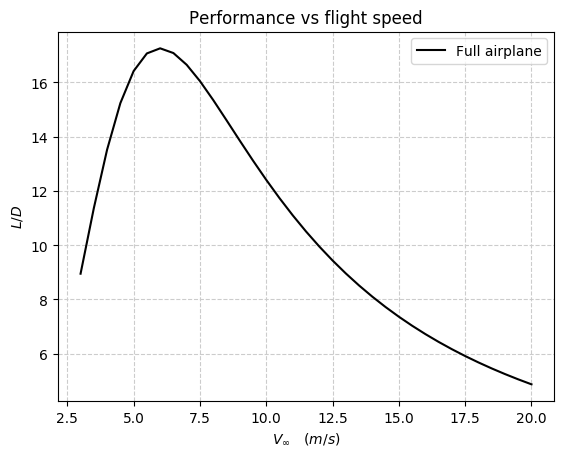

CDp=[0.00266094,0.00849367,0.0029403,0.0119899]	sum(CDp)=0.026084810360692587
CDp=[0.00246356,0.00786361,0.00272219,0.0111005]	sum(CDp)=0.024149841730684497
CDp=[0.00230445,0.00735574,0.00254638,0.0103835]	sum(CDp)=0.022590108425259305
CDp=[0.00217265,0.00693505,0.00240075,0.0097897]	sum(CDp)=0.02129815847365362
CDp=[0.00206116,0.00657917,0.00227755,0.00928733]	sum(CDp)=0.020205207223188217
CDp=[0.00196524,0.00627299,0.00217156,0.00885512]	sum(CDp)=0.019264909195264777
CDp=[0.00188157,0.00600593,0.00207911,0.00847813]	sum(CDp)=0.018444746292010837
CDp=[0.00180776,0.00577031,0.00199754,0.00814553]	sum(CDp)=0.017721139026857537
CDp=[0.001742,0.00556041,0.00192488,0.00784923]	sum(CDp)=0.017076516852348872
CDp=[0.00168293,0.00537187,0.00185961,0.00758307]	sum(CDp)=0.016497482614669372
CDp=[0.00162949,0.00520129,0.00180056,0.00734228]	sum(CDp)=0.015973618855240217
CDp=[0.00158084,0.00504599,0.0017468,0.00712306]	sum(CDp)=0.015496686532591357
CDp=[0.0015363,0.00490382,0.00169759,0.00692237]	

PyObject <matplotlib.legend.Legend object at 0x7fdc5aa19f50>

In [6]:
ys = [[], [], [], []]
for (i,Vinf) in enumerate(x)
    CDs = calc_CDtot(Vinf; Cftype="transition")
    for (j,CD) in enumerate(CDs)
        push!(ys[j], CD)
    end
end

x = [Vinf for Vinf in Vinfmin:0.5:Vinfmax]
y = [sum([ys[j][i] for j in 1:4]) for i in 1:size(x)[1]]
plot(x,L./(y.*calc_qinf(x)*Sref), "k", label="Full airplane")
grid(true, color="0.8", linestyle="--")
xlabel(L"V_\infty \quad (m/s)")
ylabel(L"L/D")
title("Performance vs flight speed")
legend(loc="best")

And here it is assuming turbulent flow all the way:

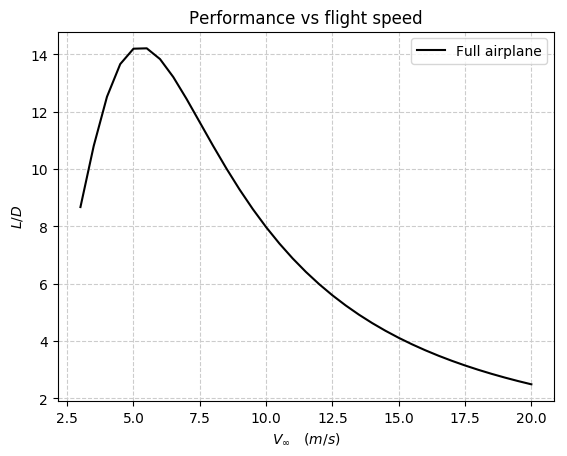

CDp=[0.0040451,0.0105291,0.00330084,0.0130921]	sum(CDp)=0.03096719580491094
CDp=[0.00390361,0.0101334,0.00317183,0.0125745]	sum(CDp)=0.029783335353705698
CDp=[0.00378653,0.00980705,0.00306566,0.0121488]	sum(CDp)=0.028808076325505777
CDp=[0.00368727,0.0095312,0.00297607,0.0117898]	sum(CDp)=0.027984295052930944
CDp=[0.00360151,0.00929348,0.00289898,0.0114809]	sum(CDp)=0.027274880832408213
CDp=[0.00352629,0.00908547,0.0028316,0.0112111]	sum(CDp)=0.026654487470419402
CDp=[0.00345952,0.00890116,0.00277198,0.0109724]	sum(CDp)=0.02610510549147753
CDp=[0.00339963,0.00873617,0.00271866,0.0107591]	sum(CDp)=0.025613521449224325
CDp=[0.00334546,0.00858717,0.00267055,0.0105666]	sum(CDp)=0.025169779973351535
CDp=[0.00329609,0.00845161,0.00262682,0.0103917]	sum(CDp)=0.024766210996690324
CDp=[0.00325083,0.00832747,0.0025868,0.0102317]	sum(CDp)=0.02439679142865121
CDp=[0.00320909,0.00821315,0.00254998,0.0100845]	sum(CDp)=0.024056713002044847
CDp=[0.00317042,0.00810736,0.00251593,0.00994838]	sum(CDp)=0.

In [14]:
ys = [[], [], [], []]
for (i,Vinf) in enumerate(x)
    CDs = calc_CDtot(Vinf; Cftype="turbulent")
    for (j,CD) in enumerate(CDs)
        push!(ys[j], CD)
    end
end

# x = [Vinf for Vinf in Vinfmin:0.5:Vinfmax]
y = [sum([ys[j][i] for j in 1:4]) for i in 1:size(x)[1]]
plot(x,L./(y.*calc_qinf(x)*Sref), "k", label="Full airplane")
grid(true, color="0.8", linestyle="--")
xlabel(L"V_\infty \quad (m/s)")
ylabel(L"L/D")
title("Performance vs flight speed")
legend(loc="best")



# savefig("../week8/img/L_over_D00.png")
using JLD
save("../week8/data/L_over_D.jld", "Vinfs", x, 
        "L_over_Ds", L./(y.*calc_qinf(x)*Sref), "Dtot_curve", Dtot_curve)

Hence, the optimum flight speed for this configuration is about 11.0 m/s, with the following performance at that such speed:

In [8]:
Vinfopt = 11.0 
CLopt = L/(calc_qinf(Vinfopt)*Sref)

println("Optimum flight speed: \t\t$Vinfopt (m/s)")
println("Reynolds number for main wing: \t$(Int64(round(calc_Re(Vinfopt, barc_w),0)))")
println("Lift coefficient (CL): \t\t$(round(CLopt,2))")
println("Max L/D (laminar-turbulent): \t$(round(CLopt/sum(calc_CDtot(Vinfopt; Cftype="transition")),1))")
println("Max L/D (fully turbulent): \t$(round(CLopt/sum(calc_CDtot(Vinfopt; Cftype="turbulent")),1))")

Optimum flight speed: 		11.0 (m/s)
Reynolds number for main wing: 	109493
Lift coefficient (CL): 		0.16
CDp=[0.00138963,0.00443568,0.00153552,0.00626152]	sum(CDp)=0.0136223479309148
Max L/D (laminar-turbulent): 	11.1
CDp=[0.00303965,0.00775055,0.00240125,0.00949022]	sum(CDp)=0.022681665858922548
Max L/D (fully turbulent): 	6.9


Such values are for the full airplane, so let's split it up between components:

In [9]:
println("WING")
CL_wing = CLopt*(1-CLratio)
CDtran_wing = calc_CDtot(Vinfopt; Cftype="transition")[2]
CDturb_wing = calc_CDtot(Vinfopt; Cftype="turbulent")[2]
println("\tLift coefficient (CL): \t\t$(round(CL_wing,2))")
println("\tMax L/D (laminar-turbulent): \t$(
                round(CL_wing/CDtran_wing,1))")
println("\tMax L/D (fully turbulent): \t$(
                round(CL_wing/CDturb_wing,1))")

println("CANARD")
CL_can = CLopt*CLratio
CDtran_can = calc_CDtot(Vinfopt; Cftype="transition")[3]
CDturb_can = calc_CDtot(Vinfopt; Cftype="turbulent")[3]
println("\tLift coefficient (CL): \t\t$(round(CL_can,2))")
println("\tMax L/D (laminar-turbulent): \t$(
                round(CL_can/CDtran_can,1))")
println("\tMax L/D (fully turbulent): \t$(
                round(CL_can/CDturb_can,1))")

WING
CDp=[0.00138963,0.00443568,0.00153552,0.00626152]	sum(CDp)=0.0136223479309148
CDp=[0.00303965,0.00775055,0.00240125,0.00949022]	sum(CDp)=0.022681665858922548
	Lift coefficient (CL): 		0.15
	Max L/D (laminar-turbulent): 	26.4
	Max L/D (fully turbulent): 	16.5
CANARD
CDp=[0.00138963,0.00443568,0.00153552,0.00626152]	sum(CDp)=0.0136223479309148
CDp=[0.00303965,0.00775055,0.00240125,0.00949022]	sum(CDp)=0.022681665858922548
	Lift coefficient (CL): 		0.02
	Max L/D (laminar-turbulent): 	10.5
	Max L/D (fully turbulent): 	6.8


## Good looking visuals

(for this section Paraview is needed: `>sudo apt-get install paraview` )

The geometry defined above can be visualized running the following command:


In [10]:
# VLM
include("../code/FLOWVLM20170929/src/FLOWVLM.jl")
vlm = FLOWVLM

save_path = "temp00/"
run_name = "unstallable"

run(`mkdir $save_path`)

# Number of lattices
n = 1
n_w = 20*n
n_c = 10*n
n_t = 5*n
n_f = 2*n
# Lattices expansions
r_w = 5.0
r_c = 5.0
r_t = 1.0
r_f = 1.0


# Creates components
wing = vlm.simpleWing(b_w, AR_w, tr_w, twist_wroot*180/pi,
                  lambda_w*180/pi, gamma_w*180/pi;
                  twist_tip=twist_wtip*180/pi, n=n_w, r=r_w)
canard = vlm.simpleWing(b_c, AR_c, tr_c, twist_croot*180/pi,
                  lambda_c*180/pi, gamma_c*180/pi;
                  twist_tip=twist_ctip*180/pi, n=n_c, r=r_c)

fuselage = vlm.Wing(0.0, -w/2, w/2, l, 0.0)
vlm.addchord(fuselage, 0.0, w/2, w/2, l, 0.0, n_f; r=r_f)
vlm.addchord(fuselage, 0.0, w/2, -w/2, l, 0.0, n_f; r=r_f)
vlm.addchord(fuselage, 0.0, -w/2, -w/2, l, 0.0, n_f; r=r_f)
vlm.addchord(fuselage, 0.0, -w/2, w/2, l, 0.0, n_f; r=r_f)

tail = vlm.Wing(0.0, 0, 0, l_troot, 0.0)
vlm.addchord(tail, l_troot-l_ttip, h_t, 0.0, l_ttip, 0.0, n_t; r=r_t)

# Assembly
system = vlm.WingSystem()
vlm.addwing(system, "Fuselage", fuselage)
vlm.addwing(system, "Wing", wing)
vlm.addwing(system, "Canard", canard)
vlm.addwing(system, "VTail", tail)
vlm.setcoordsystem(system, [x_w,y_w,z_w], [1.0 0 0; 0 1 0; 0 0 1] ;wings=["Wing"])
vlm.setcoordsystem(system, [x_c,y_c,z_c], [1.0 0 0; 0 1 0; 0 0 1] ;wings=["Canard"])
vlm.setcoordsystem(system, [x_t,y_t,z_t], [1.0 0 0; 0 0 1; 0 -1 0] ;wings=["VTail"])

Uinf(X,t) = [1.0, 0, 0]
vlm.setVinf(system, Uinf)
vlm.save(system, run_name; save_horseshoes=true, path=save_path)

strng = save_path
for aux1 in ["Fuselage", "Wing", "VTail", "Canard"]
  strng = strng * run_name * "_"*aux1*"_vlm.vtk;"
end
run(`paraview --data=$(strng)`)
run(`rm -rf $save_path`)


mkdir: cannot create directory ‘temp00/’: File exists


LoadError: failed process: Process(`mkdir temp00/`, ProcessExited(1)) [1]

It will pop up paraview displaying something like this:

<img src="img/unstallable01.png" alt="Pic here" style="width:700px">

## Etc

If useful at all, here is the analytical calculation:

<img src="img/IMG_2980.JPG" alt="Pic here" style="width:400px">

In [11]:
Vinfopt = 12.5 
AR = b_w / barc_w 
_, CDp_w, _, _ = calc_CDp(Vinfopt)
e = 1 / (1/0.98 + 0.38*CDp_w*pi*AR)
CLstar = sqrt(pi*AR*e*CDp_w) 
CLnum = L/(calc_qinf(Vinfopt)*Sref)*(1-CLratio)

L_over_D_star = 1/2*sqrt(pi*AR*e/CDp_w)

println("Analytical optimum CL_{wing}: \t$CLstar")
println("Numerical optimum CL_{wing}: \t$(CLnum)")
println("")
println("Analytical max (L/D)_{wing}: \t$(round(L_over_D_star,1))")
println("Numerical max (L/D)_{wing}: \t$(
            round(CLnum/calc_CDtot(Vinfopt; Cftype="turbulent")[2],1))")

Analytical optimum CL_{wing}: 	0.28055038934515736
Numerical optimum CL_{wing}: 	0.11458522386705437

Analytical max (L/D)_{wing}: 	33.7
CDp=[0.00296022,0.00753453,0.00233195,0.0092135]	sum(CDp)=0.022040198034314406
Numerical max (L/D)_{wing}: 	13.9


From there we notice that the analytical optimum CL differs from the numerical in about 100%, however, we must remember that the numerical calculation were carried on assuming that not all the lift is generated by the wing, it is rather distributed between the wing and the canard. 

# After Kevin's optimization:

moore54 [9:14 AM] 
Flying at 11 m/s,  4.72145 degrees root, 6.06702 degrees mid 5.36544 degrees tip 4.24697 degrees on the canard, minimum system induced drag for the system weight, einv of the wing is 0.85, and of the system is 0.84.  Any feedback, it takes about 15 min to get a new optimum if we change a something.


moore54 [9:23 AM] 
CL of the system is about 0.3.  Local cl max on the wing is about 0.15.  If we say that the max local cl before stall is 1.4, then the system CL is 1.3 at 20 degrees AOA.  The VLM uses "symmetric" airfoils, i.e. since the NACA 4412 has a 0 lift AOA at -5degrees, we need to subtract 5 degrees off of the twist distribution.


[9:25] 
L/D at the cruise Cl is 16.35

moore54 [9:29 AM] 
At the max AOA of 20 degrees, i.e. the CL max, we can fly at a minimum at 5.4 m/s before we don't produce enough lift to overcome weight.  Stall speed is 5.4m/s


<img src="img/liftdistribution00.png" alt="Pic here" style="width:800px">
<img src="vid/liftdistribution00.gif" alt="Pic here" style="width:800px">
<img src="vid/vortices00.gif" alt="Pic here" style="width:800px">